### November 30, 2022



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
#import statsmodels.api as sm
#import statsmodels.formula.api as smf

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)


In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("../data/diabetes.csv", header=None, names=col_names,skiprows=[0])
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)


In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train,y_train)

y_pred = log_reg.predict_proba(X_test) #this gives you both predictions
y_pred_prob = y_pred[:,1] # only choose 1 prediction

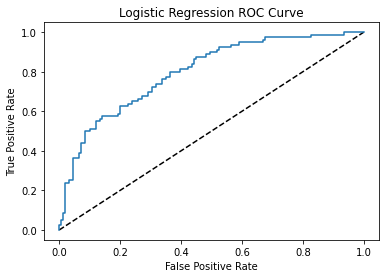

In [5]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

#### Handwritten Digits

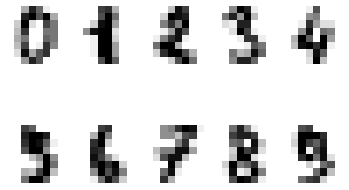

In [8]:
from sklearn import datasets

digits = datasets.load_digits()
import matplotlib.pyplot as plt

#how can I improve the plots ? (i..e no margins, box around plot...)
plt.figure(1)

for i in np.arange(10)+1:
    plt.subplot(2, 5, i)
    plt.axis('off')
    #plt.gray() 
    #plt.matshow(digits.images[i-1]) 
    plt.imshow(digits.images[i-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

global model: model depends on all data at once
local model: model only depends on local neighbourhood

In [9]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [21]:
scaler = StandardScaler()
scaler_2 = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [20]:
X_scaled

array([[ 0.63994726, -0.69289057,  0.20401277, ...,  0.84832379,
         0.14964075,  0.46849198],
       [-0.84488505, -0.69289057, -0.68442195, ..., -1.12339636,
        -0.16054575, -0.36506078],
       [ 1.23388019, -0.69289057, -1.10325546, ...,  1.94372388,
        -0.26394125,  0.60439732],
       ...,
       [ 0.3429808 ,  0.27959377, -0.73518964, ...,  0.00330087,
         0.14964075, -0.68519336],
       [-0.84488505, -0.69289057, -0.24020459, ...,  0.1597866 ,
        -0.47073225, -0.37110101],
       [-0.84488505, -0.69289057, -0.20212881, ..., -0.8730192 ,
         0.04624525, -0.47378505]])

In [22]:
X_scaled_2 = scaler_2.fit_transform(X)

In [23]:
X_scaled_2

array([[ 0.63994726, -0.69289057,  0.20401277, ...,  0.84832379,
         0.14964075,  0.46849198],
       [-0.84488505, -0.69289057, -0.68442195, ..., -1.12339636,
        -0.16054575, -0.36506078],
       [ 1.23388019, -0.69289057, -1.10325546, ...,  1.94372388,
        -0.26394125,  0.60439732],
       ...,
       [ 0.3429808 ,  0.27959377, -0.73518964, ...,  0.00330087,
         0.14964075, -0.68519336],
       [-0.84488505, -0.69289057, -0.24020459, ...,  0.1597866 ,
        -0.47073225, -0.37110101],
       [-0.84488505, -0.69289057, -0.20212881, ..., -0.8730192 ,
         0.04624525, -0.47378505]])